In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Decision Trees split data by feature values in order to arrive at predictions. Unlike linear/logistic regression models, decision trees are non-parametric. They do not make any assumptions aout the distribution of sample data. Pure decision trees tend to suffer from overfitting, as they are being fit directly over the underlying data. They are however, a key building block of other, more people bagging and ensemble methods, like random forests and XGBoost. <br>
For decision tree classifiers, there's an important mathematical concept:

### Gini Impurity
Mathematically, with C being the number of classes, and p(i) being the probability of a data point belonging to class i:
$$G = \sum\limits_{i=1}^C p(i) * (1 - p(i)) $$
This will be our loss function for the model. Within each feature, we ideally want to pick split points that perfectly seperate the data. Consider a dataset with two classes, C1 and C2:

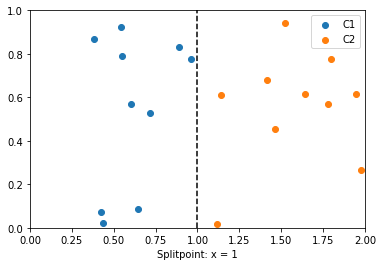

In [34]:
np.random.seed(0)
x1 = np.random.rand(10)
y1 = np.random.rand(10)
x2 = np.random.rand(10) + 1
y2 = np.random.rand(10)
plt.scatter(x1,y1,label = 'C1')
plt.scatter(x2,y2, label = 'C2')
plt.legend()
plt.vlines(1,0,1,linestyles='dashed')
plt.xlim(0,2)
plt.ylim(0,1)
plt.xlabel("Splitpoint: x = 1")
plt.show()

In the case above, the Gini impurity would be 0. At worst, we'd pick a split point with a Gini index of .5, which fails to seperate the two classes at all:

In [42]:
np.size(np.unique([3,4,5]))

3

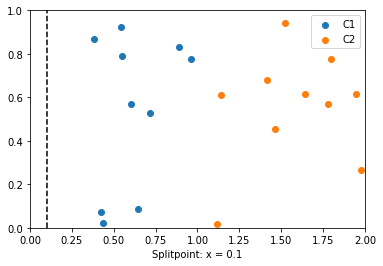

In [35]:
plt.scatter(x1,y1,label = 'C1')
plt.scatter(x2,y2, label = 'C2')
plt.legend()
plt.vlines(.1,0,1,linestyles='dashed')
plt.xlim(0,2)
plt.ylim(0,1)
plt.xlabel("Splitpoint: x = 0.1")
plt.show()

Our classifier will repeatedly split a feature at a certain value, and calculate the Gini impurity on each side of the split eighted by the number of samples on each side, until the optimal split point is found with the lowest average Gini value. Each split creates nodes. Branches of nodes are created until no split exists that would lead to a child node with less impurity, or until the max depth is reached (defined as a hyperparameter).
To sketch it out in steps:
1. __Build parent node:__ Randomly select a feature and find the split point with lowest average Gini Impurity
2. __Build child nodes:__ Select new features, and find splitpoints that lead to lower average Gini Impurity
3. __Repeat:__ Continue until no longer possible, or max depth reach

Now lets try building this

In [ ]:
class Node:
    def __init__(self, gini, num_samples, num_samples_per_class, predicted_class):
        self.gini = gini
        self.num_samples = num_samples
        self.num_samples_per_class = num_samples_per_class
        self.predicted_class = predicted_class
        self.feature_index = 0
        self.threshold = 0
        self.left = None
        self.right = None

class DecisionTreeClassifier:
    def __init__(self, max_depth=None):
        self.max_depth == max_depth
        

                
        
    def fit(X, y, depth= 0):
        self.n_classes_ = np.size(np.unique(y))
        self.n_features_ = X.shape[1]
        self.tree = self._grow_tree(X, y)
        
    def _grow_tree(self, X, Y):
        
        
        
    def _best_split(self, X, y):
        if y.size <= 1:
            return None, None
        
        parent_count = [np.sum(y == c) for c in range (self.n_classes_)]